## Downloading Open Source Repositry

In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


## Cloning Ultralytics Yolov5

In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

# Main Code 

### Importing Libraries

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Loading Model from pytorch

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in C:\Users\Asus/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-12-3 Python-3.11.3 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### Testing the Model

In [7]:
img = 'https://assets-global.website-files.com/595d6b420002832258c527cb/618abc9cdfbae01bc36d2ce5_hero_advanced_drowsiness.jpg'

In [8]:
results = model(img)
results.print()


image 1/1: 1075x2000 1 person, 1 chair
Speed: 108.3ms pre-process, 112.6ms inference, 6.0ms NMS per image at shape (1, 3, 352, 640)


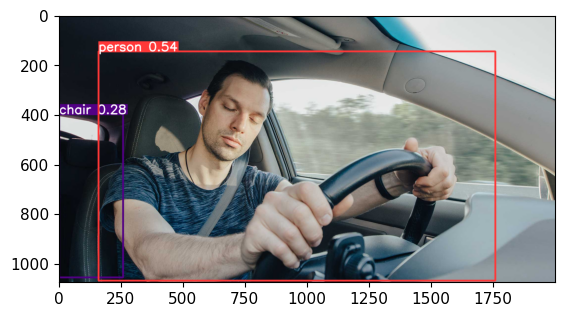

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

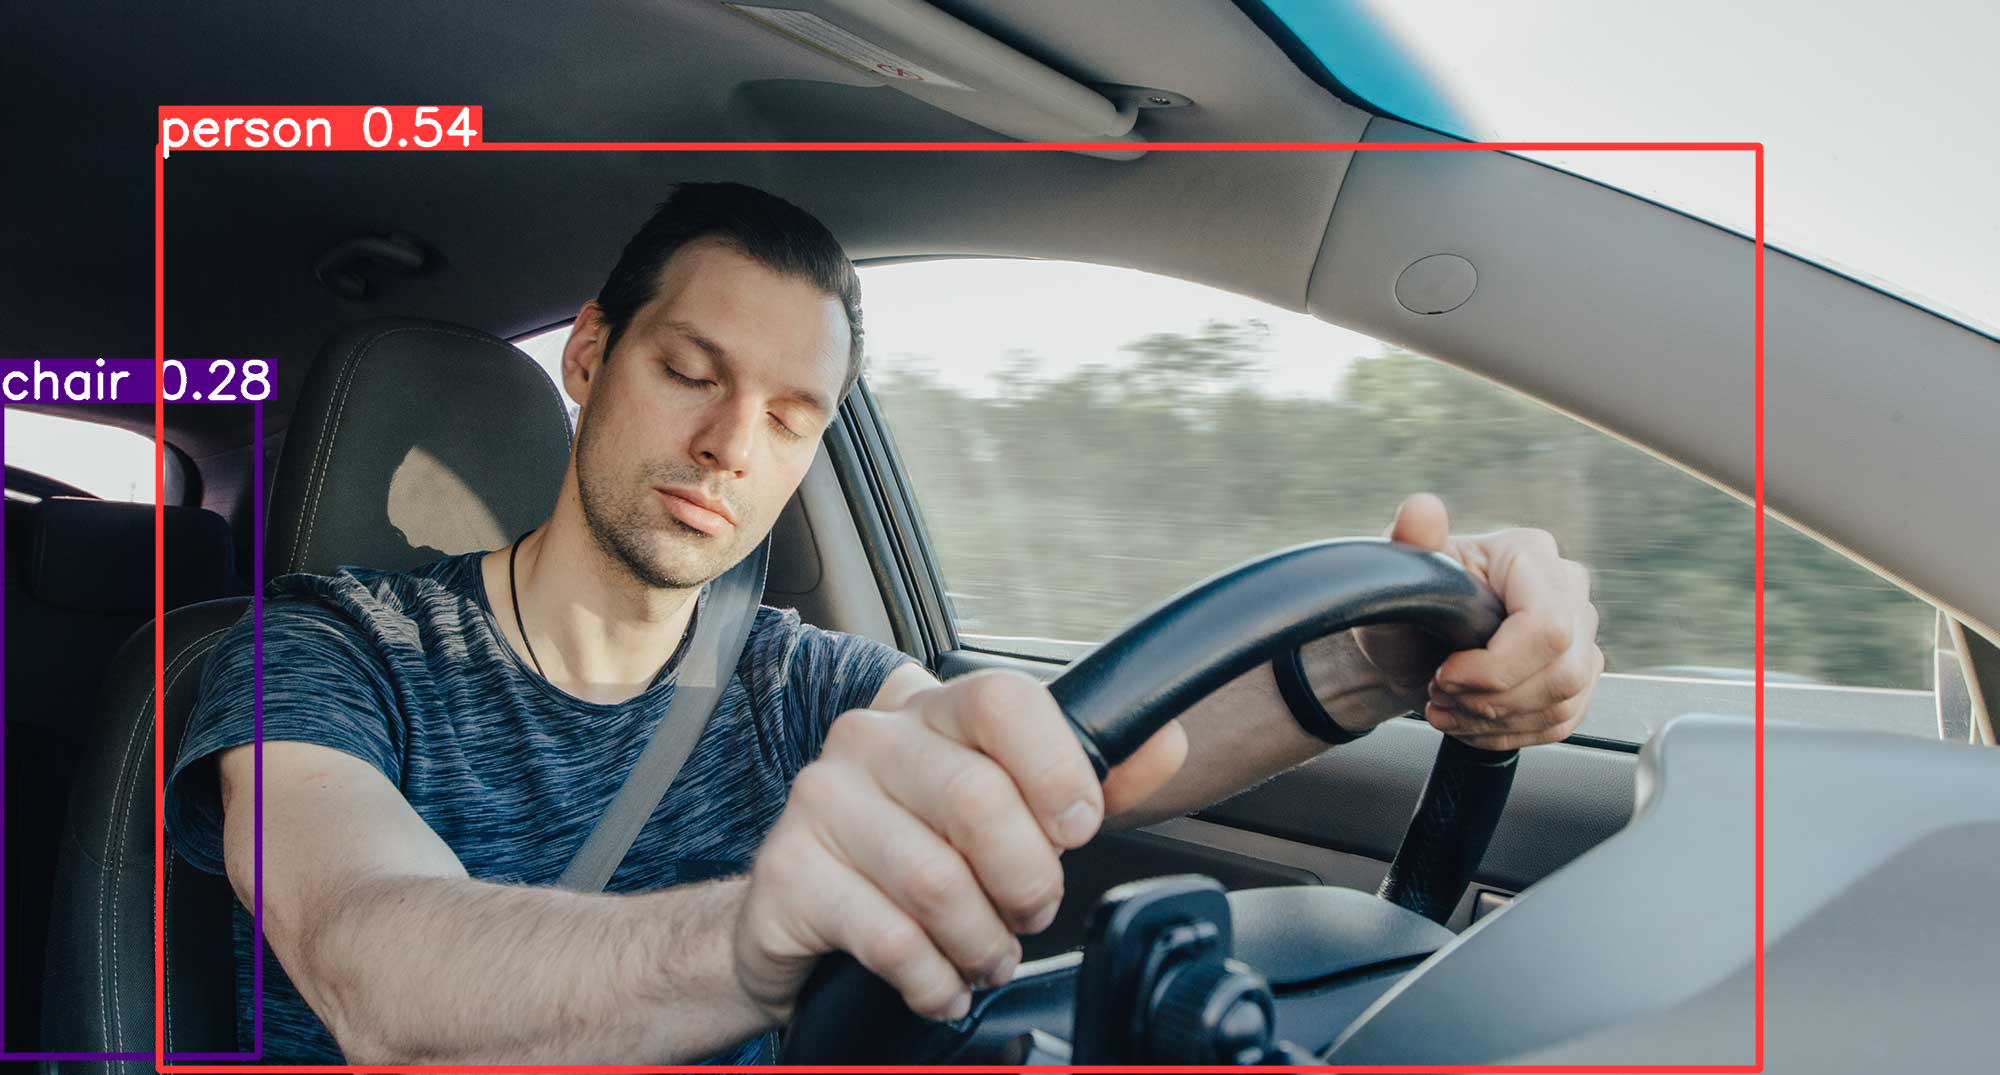

In [10]:
results.show()


In [11]:
results.render()

[array([[[ 16,  23,  33],
         [ 16,  23,  33],
         [ 17,  24,  34],
         ...,
         [211, 215, 214],
         [211, 215, 214],
         [211, 215, 214]],
 
        [[ 16,  23,  33],
         [ 16,  23,  33],
         [ 17,  24,  34],
         ...,
         [211, 215, 214],
         [211, 215, 214],
         [211, 215, 214]],
 
        [[ 16,  23,  33],
         [ 16,  23,  33],
         [ 17,  24,  34],
         ...,
         [211, 215, 214],
         [211, 215, 214],
         [211, 215, 214]],
 
        ...,
 
        [[  7,  11,  14],
         [  7,  11,  14],
         [  7,  11,  14],
         ...,
         [142, 152, 161],
         [142, 152, 161],
         [142, 152, 161]],
 
        [[  7,  11,  14],
         [  7,  11,  14],
         [  7,  11,  14],
         ...,
         [142, 152, 161],
         [142, 152, 161],
         [142, 152, 161]],
 
        [[  7,  11,  14],
         [  7,  11,  14],
         [  7,  11,  14],
         ...,
         [142, 152, 161],
  

In [12]:
np.array(results.render()).shape

(1, 1075, 2000, 3)

### Making detections and working out on code to run camera

In [14]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    # Check if the frame is successfully captured
    if not ret:
        print("Failed to capture frame")
        break

    # Make detections
    results = model(frame)

    # Check if results are not None
    if results is not None:
        rendered_frame = np.squeeze(results.render())

        # Check if the rendered frame is not None
        if rendered_frame is not None:
            cv2.imshow('YOLO', rendered_frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


## Dataset Creation

In [15]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
import uuid
import os
import time

In [16]:
images_path = os.path.join('data', 'images')
labels = ['awake','drowsy']
number_imgs = 50

In [23]:
cap = cv2.VideoCapture(0)
for label in labels:
    #printing the name of labels the image would be collevcted
    print('Collected images for {}'.format(labels))
    time.sleep(5)
    
    for img_num in range(number_imgs):
        print('Collected images for {}, image number {}' .format(labels, img_num))
        
        ret , frame = cap.read()
        #Naming an Image
        imgname = os.path.join(images_path, label + '.' +str(uuid.uuid1())+ '.jpg')
        # Assigning it a frame
        cv2.imwrite(imgname, frame)
        # Rendering it
        cv2.imshow('Image Collection', frame)
        # Giving time to move
        time.sleep(2)

Collected images for ['awake', 'drowsy']
Collected images for ['awake', 'drowsy'], image number 0
Collected images for ['awake', 'drowsy'], image number 1
Collected images for ['awake', 'drowsy'], image number 2
Collected images for ['awake', 'drowsy'], image number 3
Collected images for ['awake', 'drowsy'], image number 4
Collected images for ['awake', 'drowsy'], image number 5
Collected images for ['awake', 'drowsy'], image number 6
Collected images for ['awake', 'drowsy'], image number 7
Collected images for ['awake', 'drowsy'], image number 8
Collected images for ['awake', 'drowsy'], image number 9
Collected images for ['awake', 'drowsy'], image number 10
Collected images for ['awake', 'drowsy'], image number 11
Collected images for ['awake', 'drowsy'], image number 12
Collected images for ['awake', 'drowsy'], image number 13
Collected images for ['awake', 'drowsy'], image number 14
Collected images for ['awake', 'drowsy'], image number 15
Collected images for ['awake', 'drowsy'],

## Datset Training

### Cloning labeling file 

In [17]:
!git clone https://github.com/HumanSignal/labelImg


fatal: destination path 'labelImg' already exists and is not an empty directory.


In [18]:
!pip install pyqt5 lxml --upgrade
!cd labelImg  && pyrcc5 -o libs/resources.py resources.qrc

### Training the dataset

In [19]:
!cd yolov5 && python train.py --img 640 --batch 16 --epochs 20 --data dataset.yml --weights yolov5s.pt --cache


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
 * [new branch]      snyk-fix-9da5a0b0c0b87053afe81cdcfb84dde5 -> origin/snyk-fix-9da5a0b0c0b87053afe81cdcfb84dde5
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\Asus\Untitled': No such file or directory
YOLOv5  2023-12-3 Python-3.11.3 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

hyperparameters: lr0=

## Loading the trained Model

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
import uuid
import os
import time

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path ='yolov5/runs/train/exp/weights/last.pt')

Using cache found in C:\Users\Asus/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-12-3 Python-3.11.3 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [4]:
img = os.path.join('data','images','drowsy.fe3e8689-91f5-11ee-a01a-ac1203eef43e.jpg')

In [5]:
results = model(img)
results.print()

image 1/1: 480x640 1 drowsy
Speed: 17.6ms pre-process, 81.6ms inference, 5.0ms NMS per image at shape (1, 3, 480, 640)


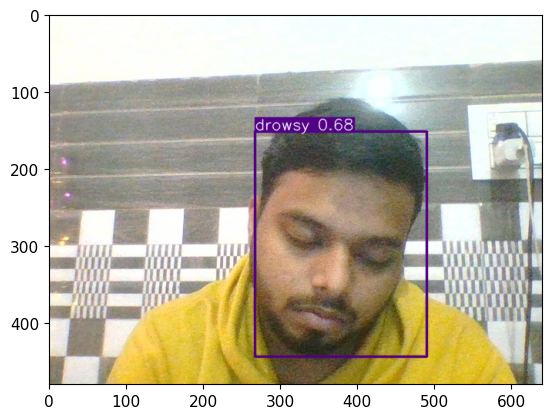

In [6]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    #make detections
    results = model(frame)
    
    rendered_img = np.squeeze(results.render())
    cv2.imshow('YOLO', rendered_img)
    
    if cv2.waitKey(10) &  0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows

<function destroyAllWindows>